## TASKS
Prepare and Explore Bike Sharing Dataset
This task involves loading and preparing a dataset for a bike sharing analysis. The objective is to familiarize yourself with the dataset, understand its structure, and select relevant variables for analysis. The dataset is 'Daily Bike Sharing.csv'. The steps include:

Importing Libraries: Import the Pandas and NumPy libraries which are essential for data manipulation.

Loading the Dataset: Load the 'Daily Bike Sharing.csv' file into a Pandas DataFrame. Use the 'dteday' column as the index and parse it as dates.

Initial Data Inspection: Display the first row of the dataset to get an overview of the data.

Variable Selection: Select specific columns for further analysis, focusing on daily count of bike rentals and various environmental and temporal factors.



In [1]:
# Import Pandas and NumPy libraries
import pandas as pd
import numpy as np

In [2]:
# Load the bike sharing data into a DataFrame with dates parsed and set as index
df_raw = pd.read_csv("Daily Bike Sharing.csv", 
                     index_col="dteday", 
                     parse_dates=True)

In [4]:
# Preview the first rows of the dataset
df_raw.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Select specific columns for analysis focusing on count of rentals and environmental factors
df = df_raw.loc[:, ["cnt", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]]
# Preview the first row of the selected columns
df.head(1)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


Data Preprocessing for Time-Series Analysis
This task focuses on preparing a dataset for time-series analysis by performing several data preprocessing steps. The dataset, assumed to contain daily records such as bike sharing data, needs to be structured and variables transformed for better analysis. The steps include:

Change the name of the 'cnt' column to 'y', which is often used to represent the target variable in modeling.

Check the current index of the DataFrame and then set it to a daily frequency, which is crucial for time-series analysis.

Transform the 'weathersit' categorical variable into dummy variables for better analysis and integration into models.



In [6]:
# Rename 'cnt' column to 'y'
df = df.rename(columns={'cnt': 'y'})
df.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [7]:
# Display the current index of the DataFrame
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [8]:
# Set the frequency of the DataFrame index to daily
df = df.asfreq("D")
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

In [9]:
# Create dummy variables for 'weathersit'
weathersit_dummy = pd.get_dummies(df.weathersit, drop_first=True)
df = pd.concat([df, weathersit_dummy], axis=1)
df.head()

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed,2,3
dteday,,,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446,True,False
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539,True,False
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309,False,False
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296,False,False
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900,False,False


In [10]:
# Remove the original 'weathersit' column
df = df.drop(columns=['weathersit'])

In [11]:
# Preview the first few rows of the modified DataFrame
df.head()

,y,holiday,workingday,temp,atemp,hum,windspeed,2,3
dteday,,,,,,,,,
2011-01-01,985,0,0,0.344167,0.363625,0.805833,0.160446,True,False
2011-01-02,801,0,0,0.363478,0.353739,0.696087,0.248539,True,False
2011-01-03,1349,0,1,0.196364,0.189405,0.437273,0.248309,False,False
2011-01-04,1562,0,1,0.200000,0.212122,0.590435,0.160296,False,False
2011-01-05,1600,0,1,0.226957,0.229270,0.436957,0.186900,False,False


Visualize Time-Series Data with Line Plots
This task is focused on visualizing time-series data to identify trends and patterns, emphasizing customizing plot elements for better clarity and visual appeal. Using Python's Matplotlib and Seaborn libraries, you will create two line plots of the same dataset. The first plot will be basic, while the second will include various customizations. Key customizations will include setting plot styles, colors, labels, titles, and legends. You will:

Create a Basic Line Plot: Start by plotting the 'y' variable against the DataFrame's index in a simple line plot.

Enhance the Plot with Custom Elements:

Apply a specific style to the plot for a cleaner background.

Modify the plot size for better visibility.

Customize the line color and add a label to the line plot.

Add a descriptive title, and label the x and y axes with appropriate names and font sizes.

Include a legend that describes the data, customizing its title and position.



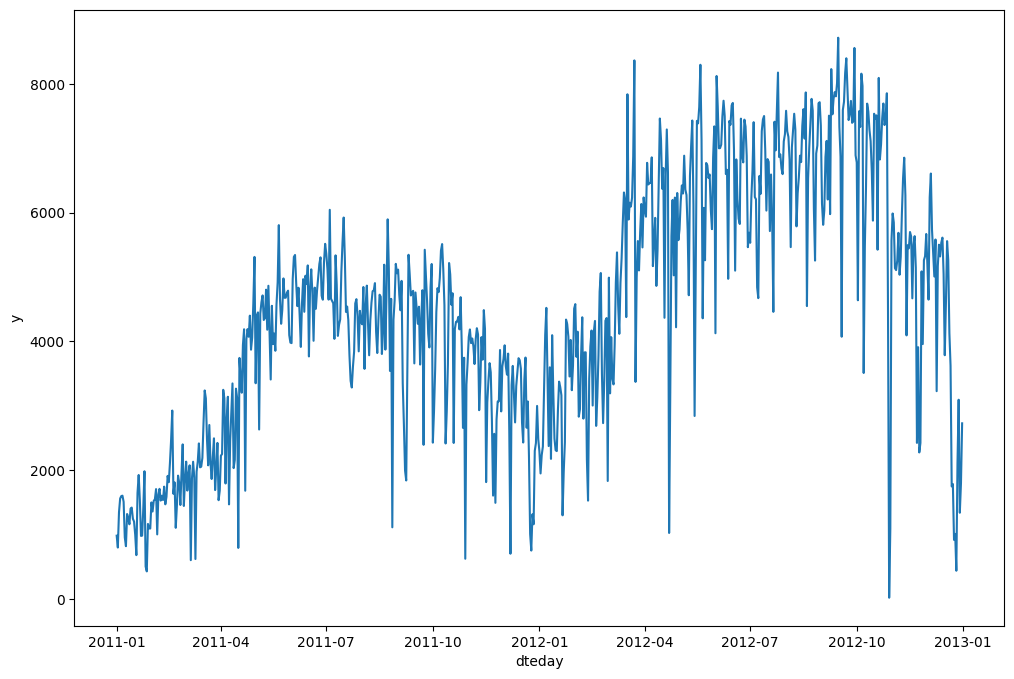

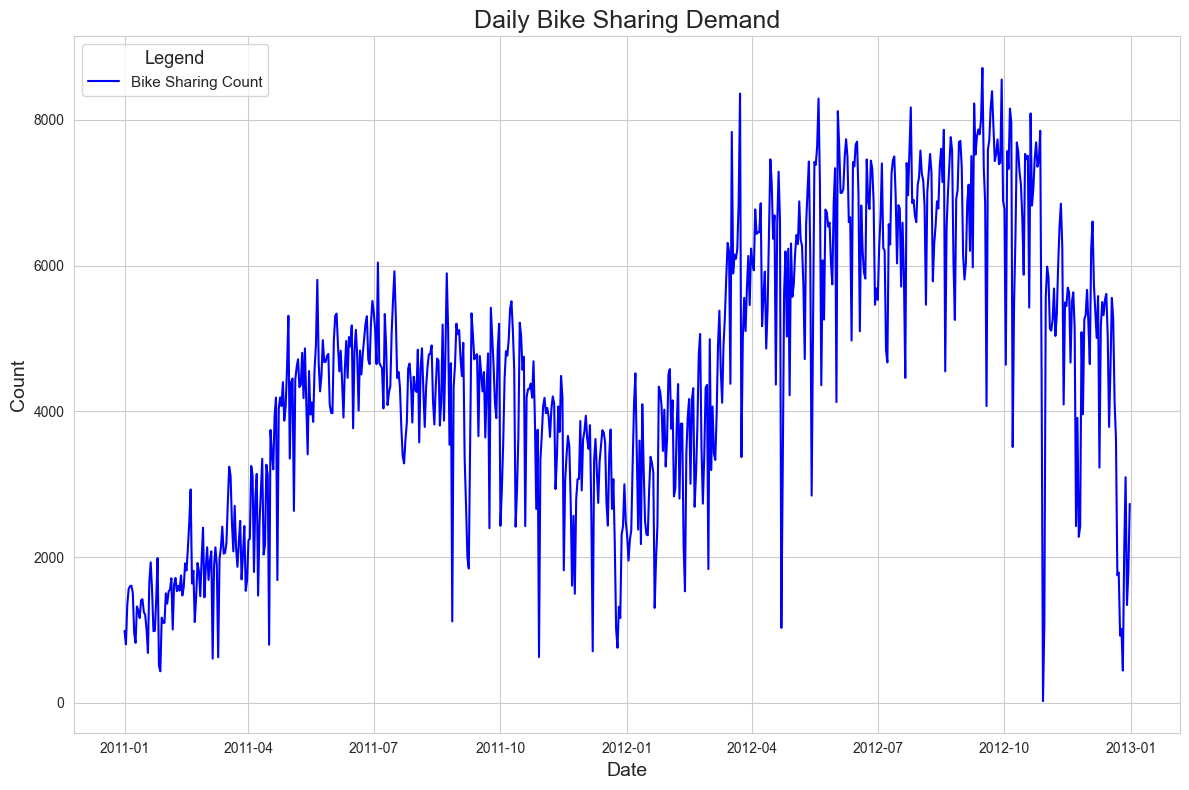

In [12]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the plot size
plt.figure(figsize=(12, 8))

# Creating a basic line plot of 'y' over time
sns.lineplot(data=df, 
             x=df.index, 
             y="y")

# Displaying the plot
plt.show()
# Setting the plot style and size
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Creating an enhanced line plot with custom color and label
sns.lineplot(data=df, 
             x=df.index, 
             y="y", 
             color="blue", 
             label="Bike Sharing Count")

# Adding title and axis labels
plt.title('Daily Bike Sharing Demand', 
          fontsize=18)
plt.xlabel('Date', 
           fontsize=14)
plt.ylabel('Count', 
           fontsize=14)

# Customizing the legend
plt.legend(title="Legend", 
           title_fontsize='13', 
           loc='upper left', 
           fontsize='11')

# Displaying the plot
plt.tight_layout()
plt.show()

Splitting Data into Training and Test Sets for Time-Series Analysis
In this task, you will split a time-series dataset into training and test sets. You will:

Determine the number of days to include in the test set. In this case, use the last 31 days of data as the test set.

Create the training set by excluding the last 31 days from df.

Create the test set with the last 31 days of df.

In [13]:
# Define the number of days to include in the test set
test_days = 31

In [14]:
# Create the training set by excluding the last 'test_days' days
training = df.iloc[:-test_days, :]

In [15]:
# Create the test set with the last 'test_days' days
test = df.iloc[-test_days:, :]
# Display the last row of the test set to verify the split
test.tail(1)

,y,holiday,workingday,temp,atemp,hum,windspeed,2,3
dteday,,,,,,,,,
2012-12-31,2729,0,1,0.215833,0.223487,0.5775,0.154846,True,False


Building Components for Time-Series Forecasting with TensorFlow Probability
In this task, you will work with TensorFlow Probability (TFP) to create components for a time-series forecasting model. The goal is to isolate key elements such as regressors, trends, and autoregressive components from the provided dataset (df). You will:

Extract independent variables (excluding 'y') from df and convert them to a matrix format.

Create a linear regression component using these variables as the design matrix.

Extract the 'y' column from the training dataset and convert it to a suitable format for time-series modeling.

Build a Local Linear Trend component using the 'y' variable to capture the trend in the time series.

Develop an Autoregressive component of order 1, using the 'y' variable to model the dependency of current values on previous values in the time series.



In [18]:
# Import TensorFlow Probability
import tensorflow_probability as tfp
# Extract independent variables as a matrix
exog = np.asmatrix(df.iloc[:, 1:].astype(np.float64))

# Preview the first row of the regressors
exog[:1]

# Create a linear regression component with these variables
regressors = tfp.sts.LinearRegression(design_matrix=exog, 
                                      name="regressors")

# Preview the regressors component
regressors
# Extract the dependent variable 'y' for modeling
y = training['y'].astype(np.float64)

# Preview the first few values of 'y'
y[:5]
# Build a Local Linear Trend component using 'y'
trend = tfp.sts.LocalLinearTrend(observed_time_series=y, 
                                 name="trend")

# Preview the trend component
trend
# Create an Autoregressive component of order 1
autoregressive = tfp.sts.Autoregressive(order=1, 
                                        observed_time_series=y, 
                                        name="autoregressive")

# Preview the autoregressive component
autoregressive

Incorporating Seasonality into Time-Series Models
This task involves adding seasonal components to a time-series forecasting model to account for patterns that repeat at regular intervals. You will use TensorFlow Probability (TFP) to create both weekly and monthly seasonal effects based on the provided dataset (df). You will:

Define a Seasonal component in TFP to model the weekly seasonality (7 days a week) in the data.

Create an array representing the number of days in each month for the years covered in the dataset.

Define another Seasonal component in TFP to capture the monthly seasonality, using the number of days in each month array to specify the number of steps per season.



In [19]:
# Create a Seasonal component for weekly seasonality
weekday_effect = tfp.sts.Seasonal(num_seasons=7, 
                                  num_steps_per_season=1, 
                                  observed_time_series=y, 
                                  name="weekday_effect")
weekday_effect
# Define the number of days in each month for the years in the dataset
num_days_per_month = np.array(
    [[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],  # 2011
     [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]])  # 2012
# Create a Seasonal component for monthly seasonality
monthly_effect = tfp.sts.Seasonal(num_seasons=12, 
                                  num_steps_per_season=num_days_per_month, 
                                  observed_time_series=y, 
                                  name="monthly_effect")
monthly_effect

Constructing and Fitting a Time-Series Forecasting Model
In this task, you are required to build a detailed time-series forecasting model using TensorFlow Probability (TFP), focusing particularly on the fitting process using Hamiltonian Monte Carlo (HMC). Your assembled model will integrate various components, including regressors, weekly and monthly seasonal effects, an autoregressive feature, and a trend element. Set the following parameters in the fit_with_hmc function with their respective values to fine-tune the model fitting:

num_results: Set this to 10.

num_warmup_steps: Set this to 10.

num_variational_steps: Use a value of 20.

In [ ]:
# Construct the forecasting model by combining various components
model = tfp.sts.Sum([regressors, 
                     weekday_effect, 
                     monthly_effect, 
                     autoregressive, 
                     trend], 
                    observed_time_series=y)
# Fit the model using Hamiltonian Monte Carlo
mcmc, kernel_results = tfp.sts.fit_with_hmc(
    model=model,
    observed_time_series=y,
    num_results=10,
    num_warmup_steps=10,
    num_variational_steps=20,
)

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\tensorflow_probability\python\mcmc\sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


Forecasting and Evaluating Time-Series Data with TensorFlow Probability
This task involves forecasting future values in a time-series dataset using TensorFlow Probability (TFP) and evaluating the forecast's accuracy. You'll use a model to generate predictions for the 31 test days, compare these predictions with actual test data, and visualize the results. The steps include:

Compute the Root Mean Squared Error (RMSE) between the forecasted values and actual values in the test set.

Plot the training data, test data, and predictions to visually assess the model's performance.

In [ ]:
# Forecast future values using the model
forecast = tfp.sts.forecast(model=model, 
                            observed_time_series=y, 
                            parameter_samples=mcmc, 
                            num_steps_forecast=len(test))

In [ ]:
# Convert forecast mean to a Pandas Series
predictions_tfp = pd.Series(forecast.mean()[:, 0], name="TFP")
predictions_tfp.index = test.index

In [ ]:
# Preview the first two predictions
predictions_tfp[:2]

In [ ]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Calculate and print the RMSE
print(f"The RMSE is {mean_squared_error(test['y'], predictions_tfp, squared=False)}")
# Plot the actual and forecasted values
training['y']['2012-07-01':].plot(figsize=(9, 6), legend=True)
test['y'].plot(legend=True)
predictions_tfp.plot(legend=True)

Implementing and Applying Time-Series Cross-Validation
In this task, you will implement a two-part time-series forecasting process using TensorFlow Probability (TFP). The first part involves creating a function to build and fit a structural time series model. The second part requires implementing a rolling forecast cross-validation method to evaluate the model's performance. The process mirrors methods used in tools like Prophet but utilizes TFP's advanced statistical modeling capabilities. The task comprises the following steps:

Create and Fit STS Model Function (create_fit_sts_model):

Implement a function that takes in training data and builds a structural time series model with TFP.

Include components like regressors, trend, autoregressive behavior, weekday and monthly seasonal effects.

Fit the model using Hamiltonian Monte Carlo (HMC).

Return the fitted model and the Markov Chain Monte Carlo (MCMC) samples.

Implement Rolling Forecast Cross-Validation (rolling_forecast_cv):

Develop a function to perform rolling forecast cross-validation on a time series dataset.

The function should split the data based on specified initial training period (540 days), horizon (31 days), and period (30 days) between forecasts.

In each iteration, use the create_fit_sts_model function to fit the model on the training set and then forecast the horizon period.

Calculate the Root Mean Squared Error (RMSE) for each forecast against the test set.

Store and return the RMSE scores and corresponding forecast dates.

Apply the Functions on a Dataset:

Use the provided dataset df to conduct rolling forecast cross-validation.

Set parameters like initial training period, horizon, and period for the cross-validation.

Display the results, which include the RMSE for each forecast period.

Please note this may take up to 60 minutes.